## Importing  Libraries

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import glob as gb
import matplotlib.pyplot as plt 
sb.set() 

#### We then added the variable 'HDI Value' which provides the Human Development Index value for each country. The Human Development Index was pulled from United Nations Development Programme. It emphasizes that people and their capabilities should be the ultimate criteria for assessing the development of a country, not economic growth alone. We will explore more into this variable later on to see if there is any correlation with the respective countries's Happiness score.

In [ ]:
Updatereport = pd.read_csv('finalData.csv')
variableDF = pd.DataFrame(Updatereport[['Happiness score','Explained by: GDP per capita','Explained by: Social support','Explained by: Healthy life expectancy','Explained by: Freedom to make life choices','Explained by: Generosity','Explained by: Perceptions of corruption','Dystopia + residual','HDI Value']])

## Let us take a look at the distribution of the following numerical variables

In [ ]:
variableDF.describe().round(2)

,Happiness score,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,HDI Value
count,148.00,148.00,148.00,148.00,148.00,148.00,148.00,148.00,148.00
mean,5.39,0.93,1.21,0.63,0.42,0.20,0.12,1.88,0.73
std,1.12,0.40,0.30,0.24,0.15,0.11,0.10,0.50,0.16
min,2.95,0.01,0.00,0.04,0.03,0.00,0.00,0.28,0.38
25%,4.49,0.62,1.06,0.45,0.33,0.12,0.05,1.60,0.60
50%,5.44,1.01,1.27,0.69,0.44,0.20,0.08,1.90,0.76
75%,6.16,1.25,1.45,0.79,0.53,0.27,0.14,2.23,0.88
max,7.62,1.74,1.63,1.03,0.67,0.67,0.46,2.91,0.97


## We then proceeded to plot our a BoxPlot, Histogram Plot, and Violin Plot for each of the variables to visualise and observe the landscape and situation of our data

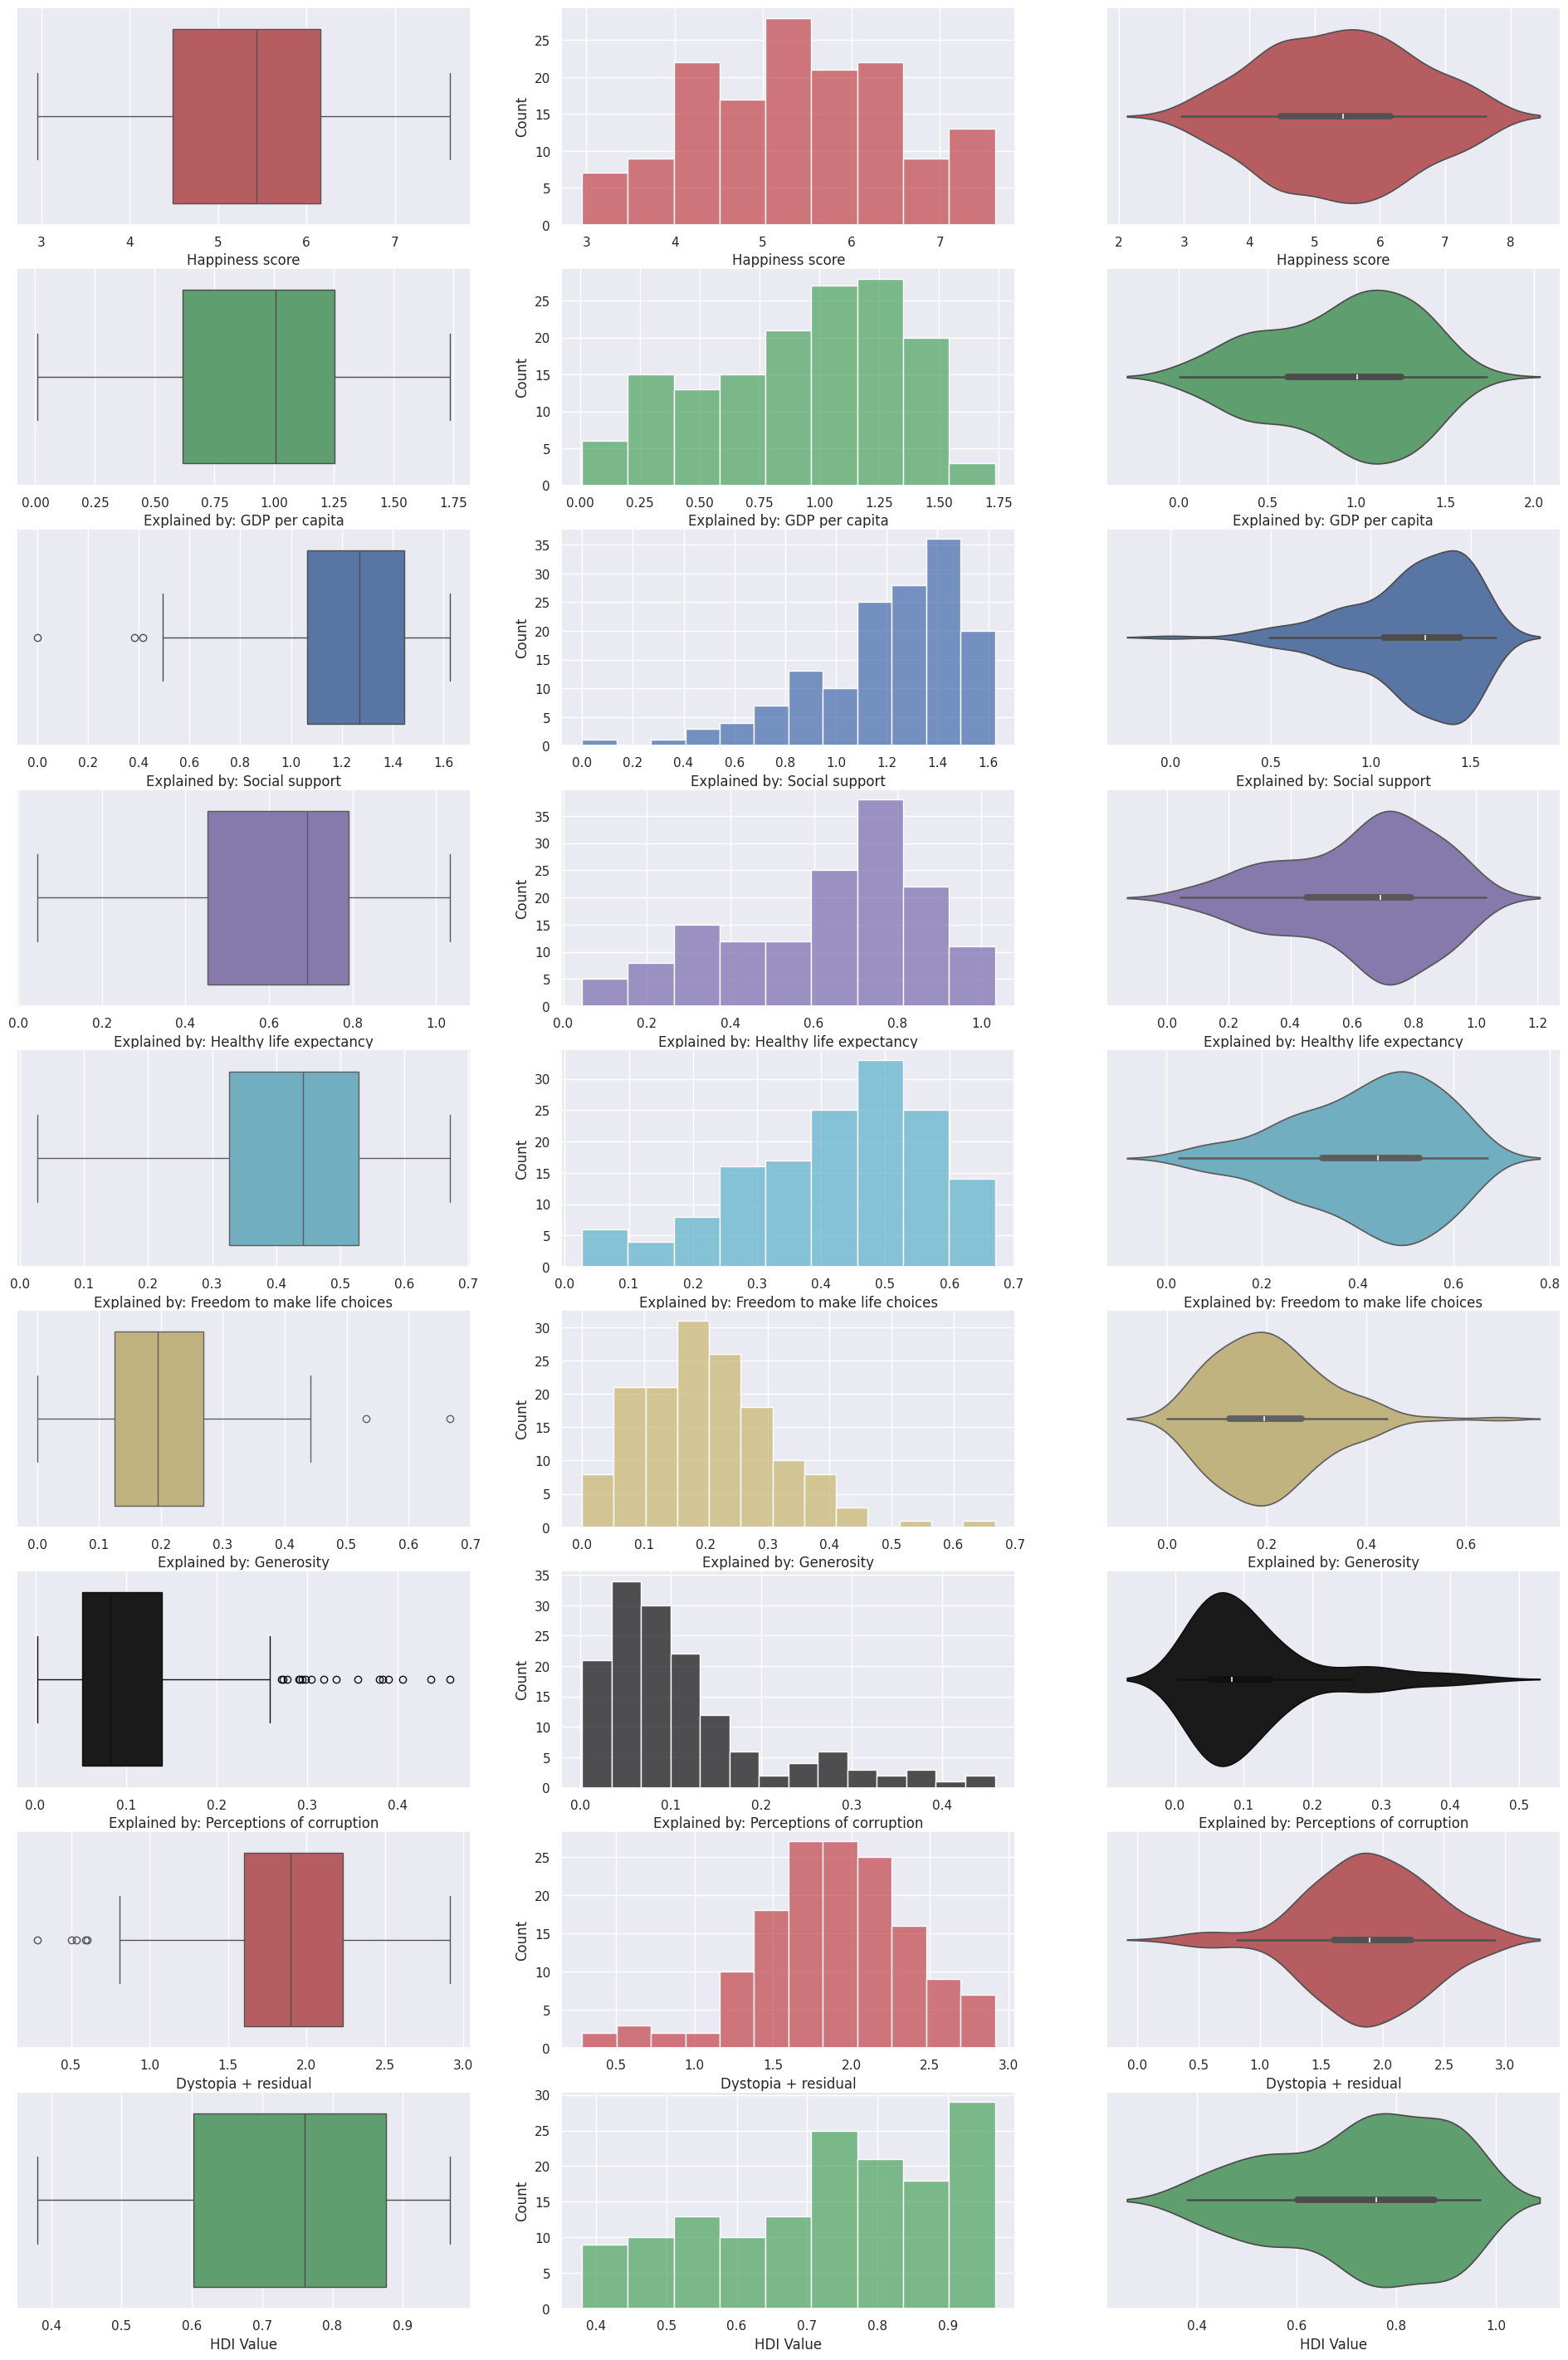

In [ ]:
# Draw the distributions of all variables
f, axes = plt.subplots(9, 3, figsize=(24, 36))
colors = ["r","g","b","m","c","y","k","r","g"]
count = 0
for var in variableDF:
    sb.boxplot(data = variableDF[var], orient = "h", color=colors[count],ax = axes[count,0])
    sb.histplot(data = variableDF[var], color=colors[count], ax = axes[count,1])
    sb.violinplot(data = variableDF[var], orient = "h", color=colors[count], ax = axes[count,2])
    count += 1

In [ ]:
variableDF.skew()

Happiness score                               0.024390
Explained by: GDP per capita                 -0.404375
Explained by: Social support                 -1.178997
Explained by: Healthy life expectancy        -0.573565
Explained by: Freedom to make life choices   -0.621803
Explained by: Generosity                      0.855918
Explained by: Perceptions of corruption       1.578395
Dystopia + residual                          -0.456375
HDI Value                                    -0.474021
dtype: float64

#### - As seen from the graphs above and skew function, most of the variables are negatively skewed, except for 'Perceptions of corruption' and 'Generosity'.

#### - Another detail is that most of the variables have few or no outliers, with the exception of 'Perceptions of corruption'.

## Next, we created a Corrrelation Matrix for all the variables to find out which variables have the most corrleation to Happiness score.

In [ ]:
# Correlation Matrix
variableDF.corr()

,Happiness score,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,HDI Value
Happiness score,1.000000,0.812071,0.779950,0.792095,0.574119,0.121340,0.427267,0.470423,0.827406
Explained by: GDP per capita,0.812071,1.000000,0.727241,0.863269,0.381062,-0.031364,0.335786,0.003068,0.940596
Explained by: Social support,0.779950,0.727241,1.000000,0.685590,0.455060,0.016492,0.224768,0.061991,0.745465
Explained by: Healthy life expectancy,0.792095,0.863269,0.685590,1.000000,0.364472,0.005372,0.315263,0.029652,0.928417
Explained by: Freedom to make life choices,0.574119,0.381062,0.455060,0.364472,1.000000,0.302358,0.489404,0.080997,0.403897
Explained by: Generosity,0.121340,-0.031364,0.016492,0.005372,0.302358,1.000000,0.341871,-0.090567,0.003563
Explained by: Perceptions of corruption,0.427267,0.335786,0.224768,0.315263,0.489404,0.341871,1.000000,-0.009233,0.327026
Dystopia + residual,0.470423,0.003068,0.061991,0.029652,0.080997,-0.090567,-0.009233,1.000000,0.031075
HDI Value,0.827406,0.940596,0.745465,0.928417,0.403897,0.003563,0.327026,0.031075,1.000000


<Axes: >

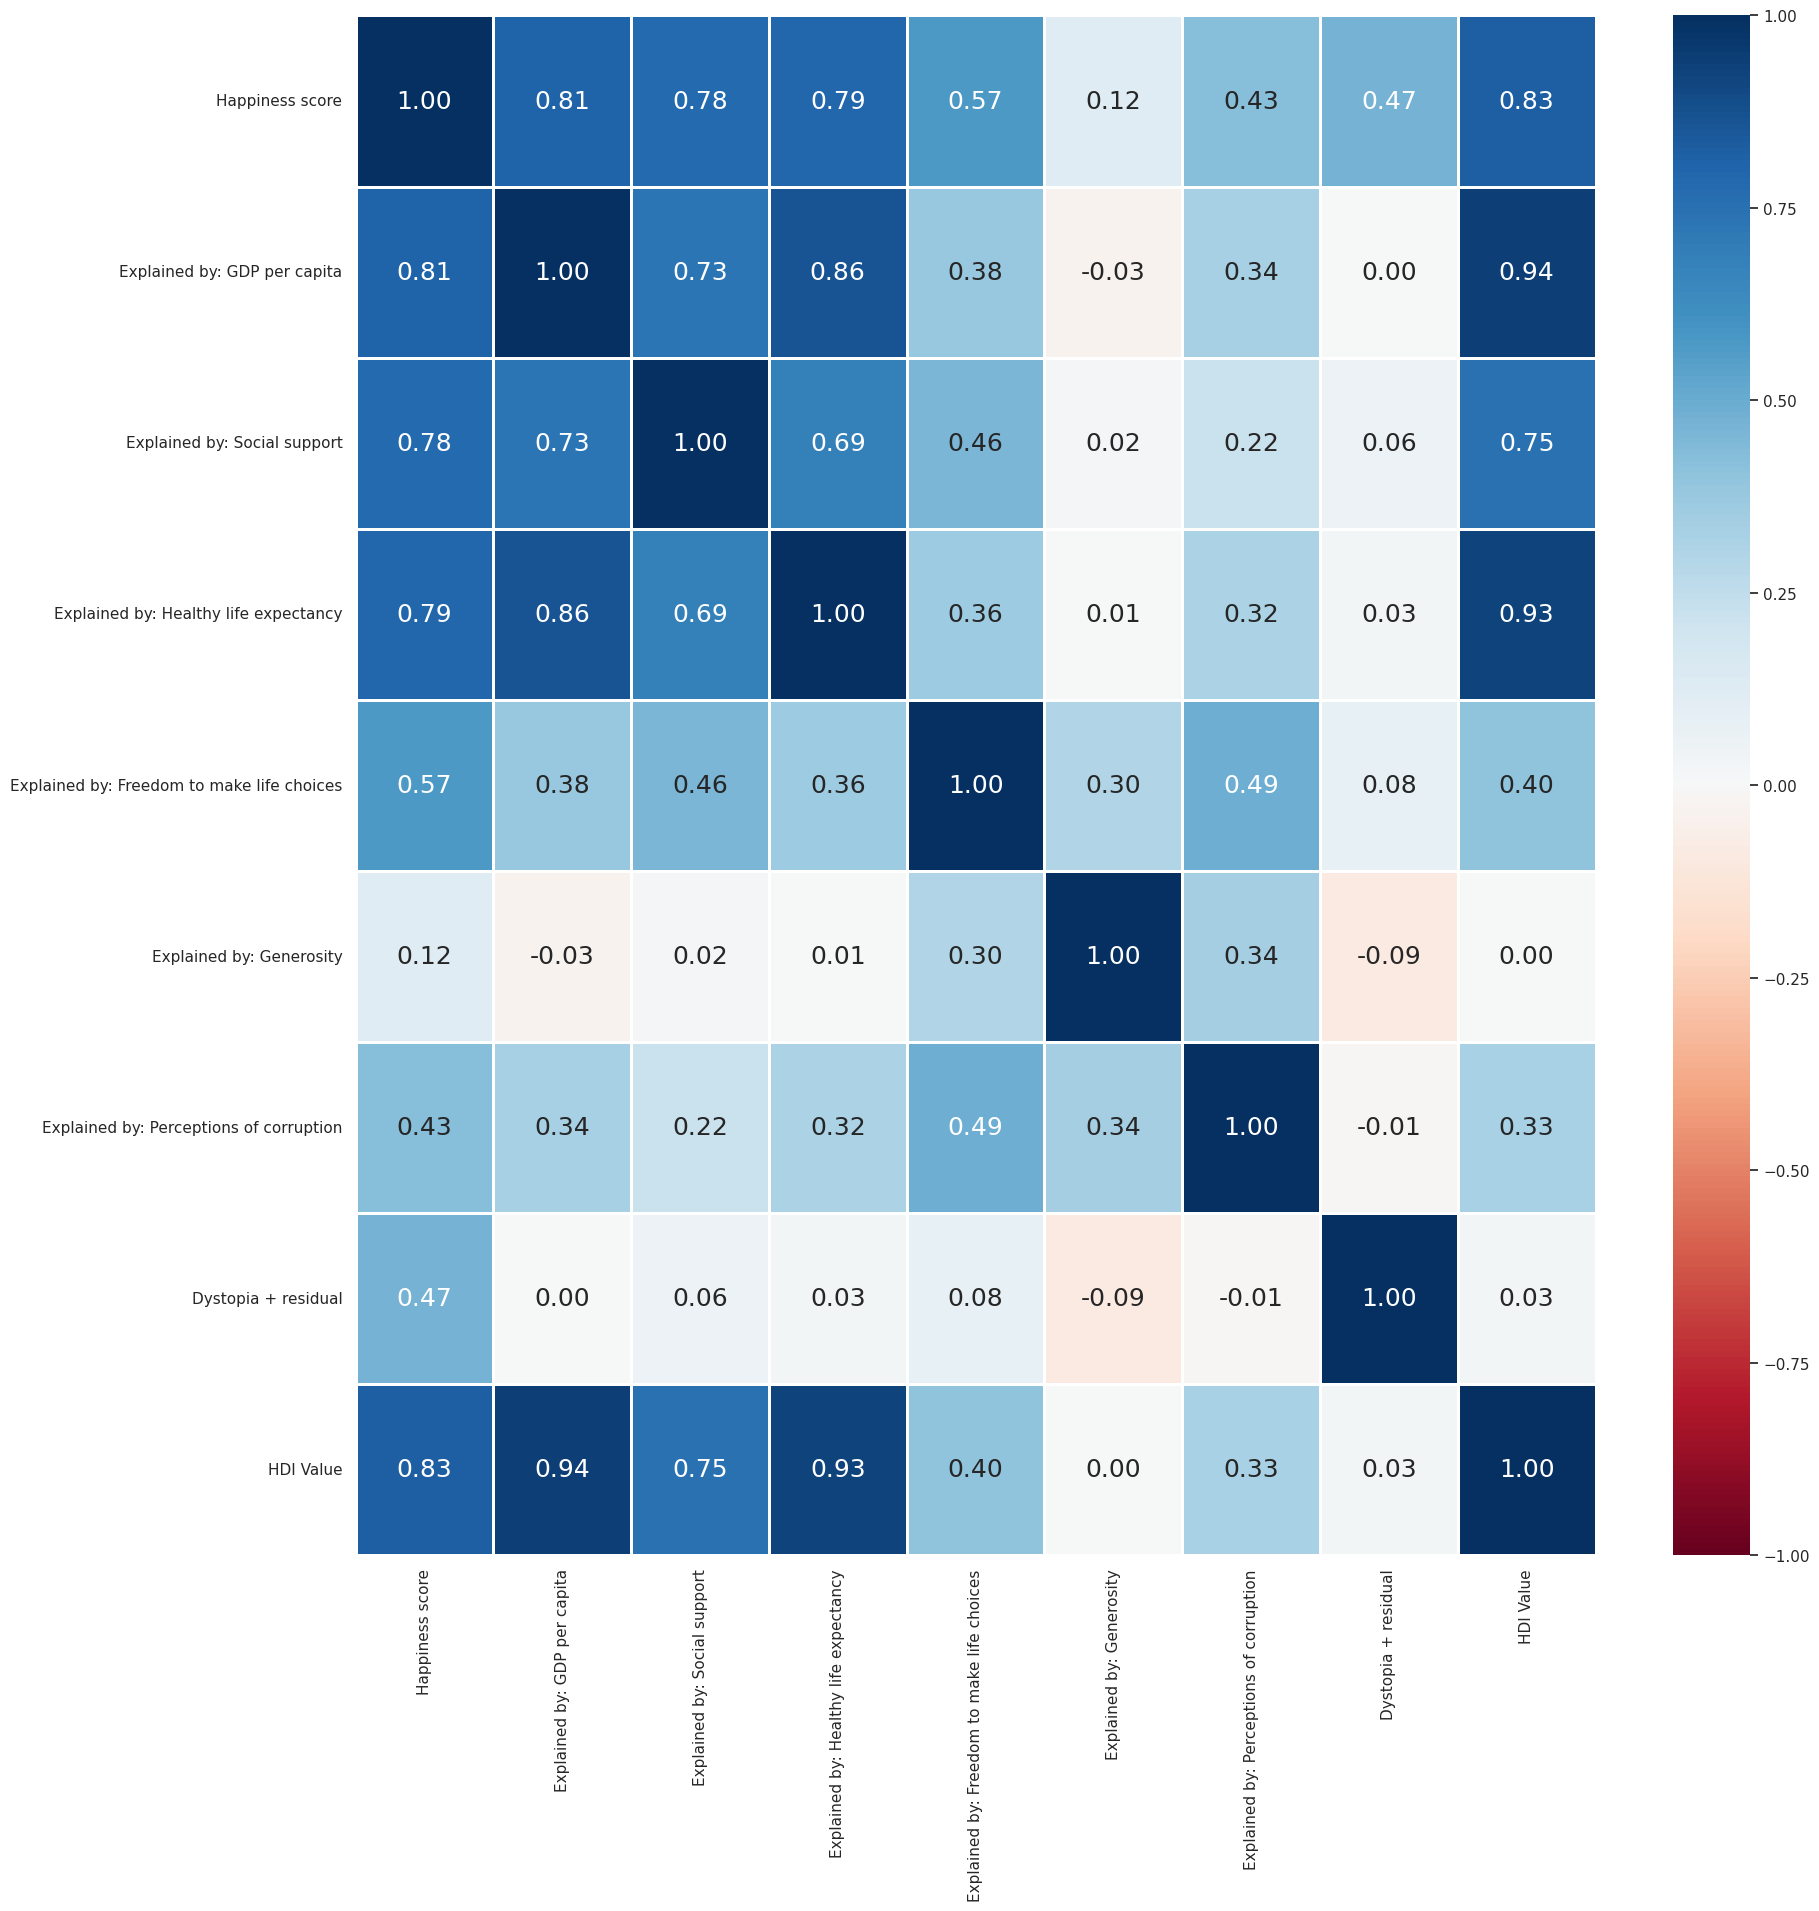

In [ ]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(variableDF.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

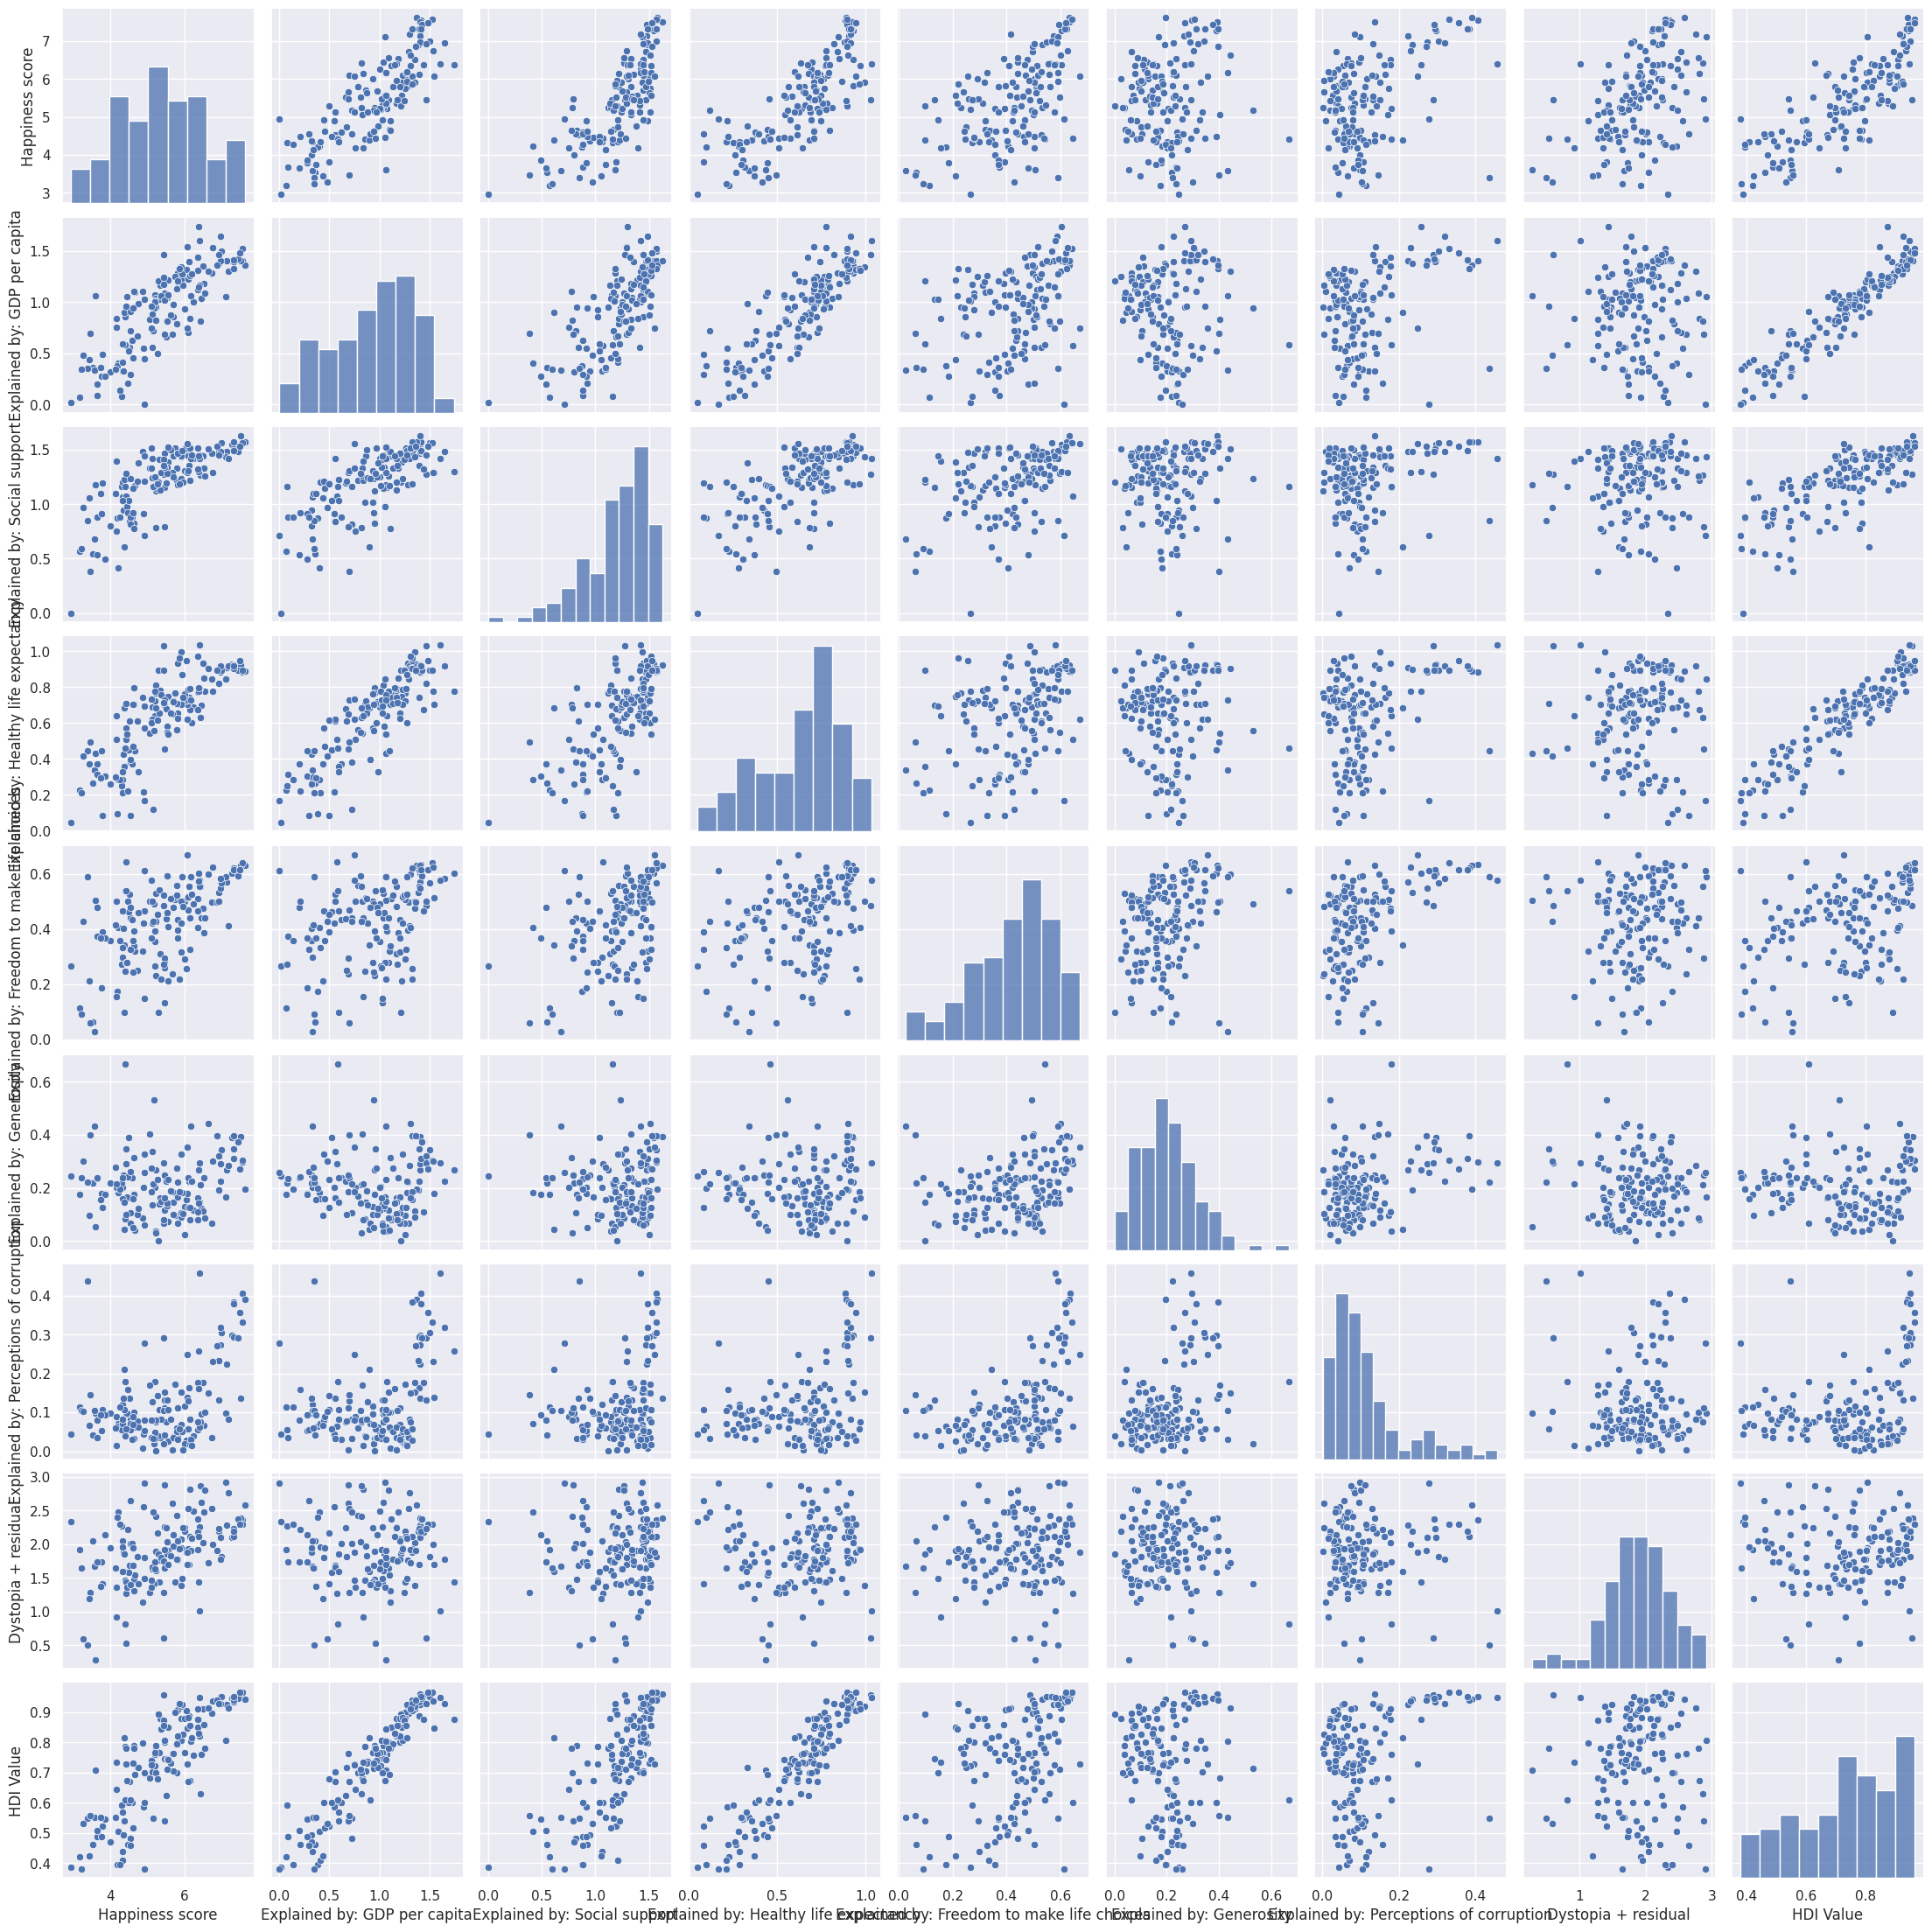

In [ ]:
sb.pairplot(data = variableDF)

#### Looking at the graphs above, we can see that:
#### - Happiness score has relatively high correlations with 'GDP per capita', 'Social support', 'Healthy Life expectency'
#### - 'GDP per capita', 'Social support', 'Healthy Life expectency' have relatively high correlations with each other
#### - 'Freedom to make choice', 'Generosity', 'Perceptions of corruption' have rather low correlations with each other
#### - 'Dystopia + residual' has a near zero correlation, which is correct, as it is supposed to represent the worst case for each of the other variables

### Now, let us take a look at the relationship between 'Happiness score' and the numeric variable we added 'HDI Value'

### It could be logically inferred that a country investing in the development of their people would have a correlation with the happiness of their people. This trend can be observed in the above plots, hence 'HDI Value' could be useful in predicting 'Happiness score'. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0674b5d1-0671-4d0f-ad7c-f1e1b27d9175' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>